In [1]:
import math
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from scipy.spatial import ConvexHull
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import pickle
from PIL import Image


<h1> Create Black and White Images </h1>

In [2]:
voxel_count_width = 100
image1 = Image.open('/Users/aloksaxena/Desktop/alok.png').convert('L').resize((voxel_count_width, voxel_count_width))
image2 = Image.open('/Users/aloksaxena/Desktop/varun.png').convert('L').resize((voxel_count_width, voxel_count_width))

black_and_white_image_1 = np.rot90((np.array(image1) < 70).astype(int), 3)
black_and_white_image_2 = np.rot90((np.array(image2) < 70).astype(int), 2)

<h1> Define cube dimensions and initialize cube matrix with trivial case </h1>

In [3]:
big_cube_side_length = 1
cube_side_length = big_cube_side_length / float(voxel_count_width)
cube_matrix = (np.random.rand(voxel_count_width, voxel_count_width, voxel_count_width) > 1.0).astype(int)
cube_matrix[:, :, 0] = black_and_white_image_1
cube_matrix[0, :, :] = black_and_white_image_2


<h1> Define position and orientation of the camera </h1>

In [4]:
# optical parameters
focal_length = 1.0
sensor_width = 1.0

# position / orientation parameters
camera_position = (0, 0, -1.5)
rotation_x_axis = 0
rotation_y_axis = 0
rotation_z_axis = 0

<h1> Determine voxel image coordinates (polygons) in a vectorized fashion </h1>

<h2> Get cube matrix voxel world coordinates </h2>

In [5]:
xv, yv, zv = np.meshgrid(np.arange(100), np.arange(100), np.arange(100))
cube_matrix_voxel_positions = np.stack([yv, xv, zv], axis=3)
cube_matrix_voxel_world_coordinates = np.zeros((voxel_count_width, voxel_count_width, voxel_count_width, 24))

# point 1
cube_matrix_voxel_world_coordinates[:,:,:,0] = (cube_matrix_voxel_positions[:,:,:,0] - 0.5 * voxel_count_width) * cube_side_length
cube_matrix_voxel_world_coordinates[:,:,:,1] = (cube_matrix_voxel_positions[:,:,:,1] - 0.5 * voxel_count_width) * cube_side_length
cube_matrix_voxel_world_coordinates[:,:,:,2] = (cube_matrix_voxel_positions[:,:,:,2] - 0.5 * voxel_count_width) * cube_side_length   

# point 2
cube_matrix_voxel_world_coordinates[:,:,:,3] = (cube_matrix_voxel_positions[:,:,:,0] - 0.5 * voxel_count_width) * cube_side_length
cube_matrix_voxel_world_coordinates[:,:,:,4] = (cube_matrix_voxel_positions[:,:,:,1] - 0.5 * voxel_count_width + 1) * cube_side_length
cube_matrix_voxel_world_coordinates[:,:,:,5] = (cube_matrix_voxel_positions[:,:,:,2] - 0.5 * voxel_count_width) * cube_side_length

# point 3
cube_matrix_voxel_world_coordinates[:,:,:,6] = (cube_matrix_voxel_positions[:,:,:,0] - 0.5 * voxel_count_width + 1) * cube_side_length
cube_matrix_voxel_world_coordinates[:,:,:,7] = (cube_matrix_voxel_positions[:,:,:,1] - 0.5 * voxel_count_width + 1) * cube_side_length
cube_matrix_voxel_world_coordinates[:,:,:,8] = (cube_matrix_voxel_positions[:,:,:,2] - 0.5 * voxel_count_width) * cube_side_length

# point 4
cube_matrix_voxel_world_coordinates[:,:,:,9] = (cube_matrix_voxel_positions[:,:,:,0] - 0.5 * voxel_count_width + 1) * cube_side_length
cube_matrix_voxel_world_coordinates[:,:,:,10] = (cube_matrix_voxel_positions[:,:,:,1] - 0.5 * voxel_count_width) * cube_side_length
cube_matrix_voxel_world_coordinates[:,:,:,11] = (cube_matrix_voxel_positions[:,:,:,2] - 0.5 * voxel_count_width) * cube_side_length

# point 5
cube_matrix_voxel_world_coordinates[:,:,:,12] = (cube_matrix_voxel_positions[:,:,:,0] - 0.5 * voxel_count_width + 1) * cube_side_length
cube_matrix_voxel_world_coordinates[:,:,:,13] = (cube_matrix_voxel_positions[:,:,:,1] - 0.5 * voxel_count_width) * cube_side_length
cube_matrix_voxel_world_coordinates[:,:,:,14] = (cube_matrix_voxel_positions[:,:,:,2] - 0.5 * voxel_count_width + 1) * cube_side_length

# point 6
cube_matrix_voxel_world_coordinates[:,:,:,15] = (cube_matrix_voxel_positions[:,:,:,0] - 0.5 * voxel_count_width + 1) * cube_side_length
cube_matrix_voxel_world_coordinates[:,:,:,16] = (cube_matrix_voxel_positions[:,:,:,1] - 0.5 * voxel_count_width + 1) * cube_side_length
cube_matrix_voxel_world_coordinates[:,:,:,17] = (cube_matrix_voxel_positions[:,:,:,2] - 0.5 * voxel_count_width + 1) * cube_side_length

# point 7
cube_matrix_voxel_world_coordinates[:,:,:,18] = (cube_matrix_voxel_positions[:,:,:,0] - 0.5 * voxel_count_width) * cube_side_length
cube_matrix_voxel_world_coordinates[:,:,:,19] = (cube_matrix_voxel_positions[:,:,:,1] - 0.5 * voxel_count_width + 1) * cube_side_length
cube_matrix_voxel_world_coordinates[:,:,:,20] = (cube_matrix_voxel_positions[:,:,:,2] - 0.5 * voxel_count_width + 1) * cube_side_length

# point 8
cube_matrix_voxel_world_coordinates[:,:,:,21] = (cube_matrix_voxel_positions[:,:,:,0] - 0.5 * voxel_count_width) * cube_side_length
cube_matrix_voxel_world_coordinates[:,:,:,22] = (cube_matrix_voxel_positions[:,:,:,1] - 0.5 * voxel_count_width) * cube_side_length
cube_matrix_voxel_world_coordinates[:,:,:,23] = (cube_matrix_voxel_positions[:,:,:,2] - 0.5 * voxel_count_width + 1) * cube_side_length


<h2> Transform the voxel world coordinates based on camera position and orientation </h2>

In [6]:
def generate_rotation_matrix(rotation_x_axis, rotation_y_axis, rotation_z_axis):
    R_x = np.array([[1, 0, 0],
                    [0, math.cos(rotation_x_axis), -math.sin(rotation_x_axis)],
                    [0, math.sin(rotation_x_axis), math.cos(rotation_x_axis)]])
    
    R_y = np.array([[math.cos(rotation_y_axis), 0, math.sin(rotation_y_axis)],
                    [0, 1, 0],
                    [-math.sin(rotation_y_axis), 0, math.cos(rotation_y_axis)]])
    
    R_z = np.array([[math.cos(rotation_z_axis), -math.sin(rotation_z_axis), 0],
                    [math.sin(rotation_z_axis), math.cos(rotation_z_axis), 0],
                    [0, 0, 1]])
    
    R = np.dot(np.dot(R_x, R_y), R_z)
    return R
    
    

In [7]:
R = generate_rotation_matrix(rotation_x_axis, rotation_y_axis, rotation_z_axis)
broadcasted_R = np.broadcast_to(R.T, (100,100,100,3,3)).T
transformed_cube_matrix_voxel_world_coordinates = np.zeros((voxel_count_width, voxel_count_width, voxel_count_width, 24))
for i in range(8):
    cube_matrix_section = cube_matrix_voxel_world_coordinates[:,:,:,3*i:3*(i+1)].T[:,np.newaxis,:,:,:]
    transformed_cube_matrix_voxel_world_coordinates[:,:,:,3*i:3*(i+1)] = np.squeeze(np.einsum('abcde,bfcde->afcde', broadcasted_R, cube_matrix_section).T)
    transformed_cube_matrix_voxel_world_coordinates[:,:,:,3*i] = transformed_cube_matrix_voxel_world_coordinates[:,:,:,3*i] - camera_position[0]
    transformed_cube_matrix_voxel_world_coordinates[:,:,:,3*i+1] = transformed_cube_matrix_voxel_world_coordinates[:,:,:,3*i+1] - camera_position[1]
    transformed_cube_matrix_voxel_world_coordinates[:,:,:,3*i+2] = transformed_cube_matrix_voxel_world_coordinates[:,:,:,3*i+2] - camera_position[2]

<h2> Get voxel image coordinates (polygons) for every single voxel in this perspective </h2>

In [8]:
cube_matrix_voxel_image_coordinates = np.zeros([voxel_count_width, voxel_count_width, voxel_count_width, 16])
for i in range(8):
    cube_matrix_voxel_image_coordinates[:,:,:,2*i] = transformed_cube_matrix_voxel_world_coordinates[:,:,:,3*i] * focal_length / transformed_cube_matrix_voxel_world_coordinates[:,:,:,3*i+2]
    cube_matrix_voxel_image_coordinates[:,:,:,2*i+1] = transformed_cube_matrix_voxel_world_coordinates[:,:,:,3*i+1] * focal_length / transformed_cube_matrix_voxel_world_coordinates[:,:,:,3*i+2]
cube_matrix_voxel_image_coordinates = cube_matrix_voxel_image_coordinates.reshape(100,100,100,8,2)

In [9]:
polygon_mapping = {}
for x in range(voxel_count_width):
    if x % 10 == 0:
        print(x)
    for y in range(voxel_count_width):
        for z in range(voxel_count_width):
            voxel_vertex_image_coordinates = cube_matrix_voxel_image_coordinates[x,y,z,:,:]
            convex_hull = ConvexHull(voxel_vertex_image_coordinates)
            polygon = Polygon(convex_hull.points[convex_hull.vertices], True)
            polygon_mapping[','.join([str(i) for i in [x, y, z]])] = polygon
            

0
10
20
30
40
50
60
70
80
90


In [12]:
polygons = []
for x in range(voxel_count_width):
    for y in range(voxel_count_width):
        for z in range(voxel_count_width):
            if cube_matrix[x, y, z]:
                polygon = polygon_mapping[','.join([str(i) for i in [x, y, z]])]
                polygons.append(polygon)

<h3> Save cached polygons to disk </h3>

In [14]:
pickle.dump(polygon_mapping, open('./cached_polygons/polygon_mapping_perspective_0.pkl', 'wb'))

<h1> Visualize Trivial Arrangement </h1>

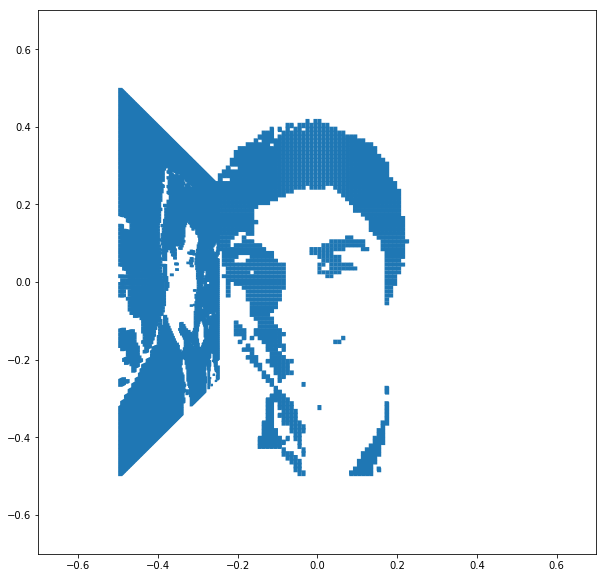

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.xlim(-0.7, 0.7)
plt.ylim(-0.7, 0.7)

p = PatchCollection(polygons, cmap=matplotlib.cm.jet, alpha=1.0)
# p.set_array(np.array(colors))
ax.add_collection(p)
plt.show()  

<h1> 

In [ ]:
polygons = []
for x in range(voxel_count_width):
    for y in range(voxel_count_width):
        if pixel_populated(x, y):
            for z in range(voxel_count_width):
                
                
                